Gold nano-sphere
============================

Comparing pyGDM to Mie theory for a gold nano-sphere (D=50nm).

Modules:

In [1]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields

from pyGDM2 import core
from pyGDM2 import tools
from pyGDM2 import linear
from pyGDM2 import visu

import numpy as np
import matplotlib.pyplot as plt


## --- load pre-calculated Mie-data
wl_mie, qext_mie, qsca_mie = np.loadtxt("scat_mie_Au_D50nm.txt").T
qabs_mie = qext_mie - qsca_mie

Simulation setup
--------------------

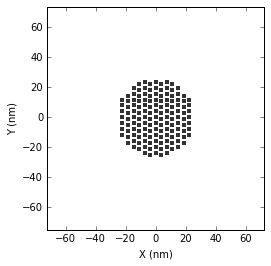

(hex) ----- N_dipoles = 1111


In [2]:
## --- Setup incident field
field_generator = fields.planewave
## log-interval spectrum (denser at low lambda):
wavelengths = np.exp(np.linspace(np.log(300), np.log(1000), 30))
kwargs = dict(theta = [0.0])
efield = fields.efield(field_generator, wavelengths=wavelengths, 
                                                   kwargs=kwargs)


## --- Setup geometry (sphere D=50nm in vacuum)
scale_factor = 1.38
step = 6.25/scale_factor
radius = 4.*scale_factor
geometry = structures.sphere(step, R=radius, mesh='hex', ORIENTATION=2)

material = materials.gold()
n1, n2 = 1.0, 1.0     # vacuum env.

struct = structures.struct(step, geometry, material, n1,n2, 
                                   structures.get_normalization('hex'))


sim = core.simulation(struct, efield)

visu.structure(sim)
print '(hex) ----- N_dipoles =', len(sim.struct.geometry),

Run the simulation
--------------------------

In [3]:
## main simulation
E = core.scatter(sim, method='lu', verbose=True)

## extinction spectrum
field_kwargs = tools.get_possible_field_params_spectra(sim)[0]
wl, spec = tools.calculate_spectrum(sim, field_kwargs, linear.extinct)
a_ext, a_sca, a_abs = spec.T
a_geo = tools.get_geometric_cross_section(sim)

timing 300.00nm:     1250.8 ms
timing 312.72nm:     1040.6 ms
timing 325.97nm:     1019.2 ms
timing 339.79nm:     1083.3 ms
timing 354.20nm:     980.4 ms
timing 369.21nm:     998.8 ms
timing 384.86nm:     971.9 ms
timing 401.17nm:     1007.1 ms
timing 418.18nm:     1032.1 ms
timing 435.91nm:     1215.7 ms
timing 454.39nm:     1014.1 ms
timing 473.65nm:     1059.3 ms
timing 493.72nm:     1054.8 ms
timing 514.65nm:     1200.3 ms
timing 536.47nm:     1039.2 ms
timing 559.21nm:     1186.9 ms
timing 582.92nm:     1184.0 ms
timing 607.63nm:     974.8 ms
timing 633.38nm:     992.0 ms
timing 660.23nm:     1325.6 ms
timing 688.22nm:     995.4 ms
timing 717.39nm:     997.0 ms
timing 747.80nm:     1352.0 ms
timing 779.50nm:     1001.4 ms
timing 812.55nm:     1187.8 ms
timing 846.99nm:     1014.9 ms
timing 882.90nm:     1310.3 ms
timing 920.32nm:     1212.5 ms
timing 959.33nm:     1111.4 ms
timing 1000.00nm:     998.8 ms


Plot the spectrum
---------------------------

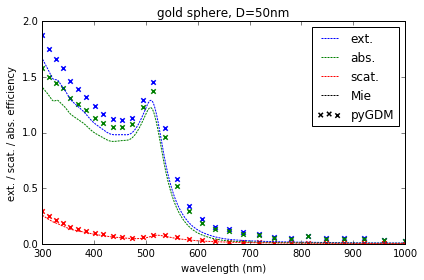

In [4]:
plt.figure()
plt.title("gold sphere, D=50nm")

## --- Mie
plt.plot(wl_mie, qext_mie, 'b--', dashes=[2,1],label='ext.')
plt.plot(wl_mie, qabs_mie, 'g--', dashes=[2,1],label='abs.')
plt.plot(wl_mie, qsca_mie, 'r--', dashes=[2,1],label='scat.')

## --- pyGDM
plt.scatter(wl, a_ext/a_geo, marker='x', linewidth=1.5, color='b', label='')
plt.scatter(wl, a_abs/a_geo, marker='x', linewidth=1.5, color='g', label='')
plt.scatter(wl, a_sca/a_geo, marker='x', linewidth=1.5, color='r', label='')

## --- for legend only
plt.plot([0], [0], 'k--', dashes=[2,1], label='Mie')
plt.scatter([0], [0], marker='x', linewidth=1.5, color='k', label='pyGDM')
## -- legend
plt.legend(loc='best', fontsize=12)


plt.xlabel("wavelength (nm)")
plt.ylabel("ext. / scat. / abs. efficiency")
plt.xlim( [wl.min(), wl.max()] )
plt.ylim( [0, 2] )


plt.tight_layout()
plt.show()

Except a slight offset in the extinction/absorption sections, the agreement with Mie theory is pretty nice. In particular, the plasmon resonance wavelength is reproduced with very good agreement.